In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons,make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def scatter_2class(X, y, ylabels =['y=0','y=1'], alpha = 0.8, ax = None):
    if ax is None:
        fig, ax = plt.subplots()
    if y is not None: 
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap ='bwr',s = 8, alpha = alpha, edgecolors = 'none')
        ax.legend(scatter.legend_elements()[0],ylabels , loc="lower right", title="Classes")
    else: 
        scatter = ax.scatter(X[:, 0], X[:, 1], c='k',s = 8, alpha = alpha, edgecolors = 'none')
def plot_classification_region(X_test, model,  alpha = 0.5):
    y_predict = model.predict(X_test)
    fig, ax = plt.subplots()
    scatter_2class(X_test, y_predict, ax = ax)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx1, xx2 = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    XX = np.c_[xx1.ravel(), xx2.ravel()]
    YY = model.predict(XX)
    
    scatter_2class(XX, YY, ax = ax, alpha = alpha)
    


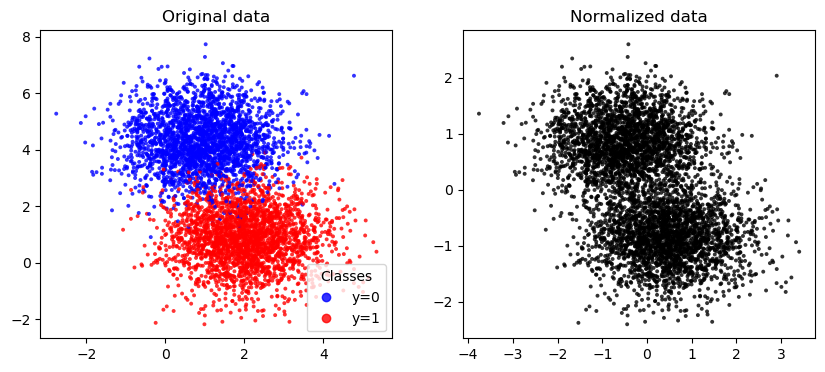

In [4]:
X,y = make_blobs(cluster_std=1, random_state=0,n_samples = 5000,
                 centers=2, n_features=2)
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

fig, axs = plt.subplots(1, 2, figsize = (10,4))
scatter_2class(X,y, ax = axs[0])
axs[0].set_title('Original data')
scatter_2class(X_norm, y=None, ax = axs[1])
axs[1].set_title('Normalized data')
plt.show()




# EM for Gaussian Mixtures 
Gaussian mixture is defined as:  
$$ p(x) = \sum_{k= 1}^K \pi_k N(x|\mu_k, \Sigma_k) \ (9.7)$$
where 
$$p(x|z_k = 1) = N(x|\mu_k, \Sigma_k)\\
p(z_k) = \pi_k\\
\sum \pi_k = 1$$
## E step 

$$\gamma(z_{nk}) = \frac{\pi_k  N(x_n|\mu_k, \Sigma_k)}{\sum_{j= 1}^K \pi_j N(x_n|\mu_j, \Sigma_j)}  (9.23)$$

## M step 

$$
\mu_k^{new} = \frac{1}{N_k} \sum_{n = 1}^N \gamma(z_{nk}) x_n \ (9.24)\\
\Sigma_k^{new} = \frac{1}{N_k}\sum_{n=1}^N  \gamma(z_{nk})(x_n -\mu_k^{new})(x_n -\mu_k^{new})^T \  (9.25) \\
\pi_k^{new} = \frac{\sum_n^N N_k }{N} \ (9.26)\\
$$
where $$ N_k = \gamma(z_{nk})  \ (9.27)$$



In [41]:
import numpy as np
from scipy.stats import multivariate_normal 

from scipy.stats import mode
class GaussianMixture_EM():
    def __init__(self, n_clusters, max_iter=10):
        self.n_clusters = n_clusters # n_clusters: number of gaussians
        self.max_iter = int(max_iter) 

    def initialize(self, X):
        # initialize means mu, covaraince sigma, mixture coefficient phi 
        n_samples,n_features = X.shape 
        n_clusters = self.n_clusters

        # initial phi, gamma, sigma, mu
        self.phi = np.ones(n_clusters)/n_clusters
        self.gamma = np.ones((n_samples, n_features))/n_clusters
        self.sigma = [ np.cov(X.T) for _ in range(n_clusters) ] 
        self.mu = np.random.rand(n_clusters, n_features)*np.max(self.sigma)
      

    
    def E_step(self, X):
         ################### BEGIN CODE #############################
            # you need to complete the E_step based on (9.23)
         
            # gamma = 
            
        #################### END CODE ##############################    
 
          

        # Creates a n*k matrix denoting probability of each point wrt each cluster 
        likelihood = np.zeros( (X.shape[0], self.n_clusters) ) 
        for k in range(self.n_clusters):
            
            # pdf : probability denisty function

            likelihood[:,k] = multivariate_normal(mean=self.mu[k],cov=self.sigma[k]).pdf(X) 

        numerator = self.phi * likelihood 
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        gamma = numerator/denominator

        self.gamma = gamma
        

    def M_step(self, X):

        ################### BEGIN CODE #############################
            # you need to complete the M_step based on (9.24-9.27)
         
            # self.mu = 
            # self.sigma = 
            # self.phi  
            
        #################### END CODE ##############################    
 
        for i in range(self.n_clusters):
            gamma = self.gamma[:, [i]]
            total_weight = gamma.sum()

            self.mu[i] = (X * gamma).sum(axis=0) / total_weight
            self.sigma[i] = np.cov(X.T,aweights=(gamma/total_weight).flatten(), bias=True)
        self.phi = self.gamma.mean(axis=0)

    # responsible for clustering the data points correctly
    def fit(self, X):
        self.initialize(X)
        for i in range(self.max_iter):
         
            self.E_step(X)
            self.M_step(X)
            

  
    
    # predict cluster of each data point  
    def predict(self, X):
        
        
        
        ################### BEGIN CODE #############################
        # calculate the probability of each data point belong to each cluster p(z_nk), i.e., gamma
        # determine datapoint belongs to which cluster with maximum probability 
        # return this clutering prediction
         
        # z_nk = 
        # return  z_nk
        #################### END CODE ############################## 
        self.E_step(X)  
        return np.argmax(self.gamma, axis=1)

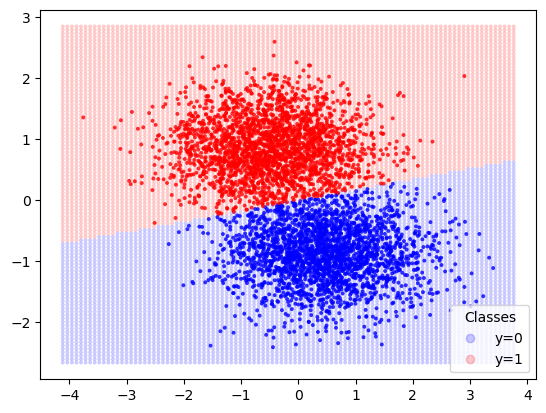

In [42]:

gmm = GaussianMixture_EM(n_clusters=2, max_iter=5000)
gmm.fit(X_norm)
y_predict = gmm.predict(X_norm)
plot_classification_region(X_norm, gmm,  alpha = 0.2)
